# Introduction

In this notebook I run through the theory asociated with the microbial competition experiments. The basic idea is to develop a model which describes the temperature dependence of respiratory flux in communities with interacting species. This requires the model to not only describe the temperature dependence of metabolism itself (as classic MTE does) but also the change in flux that occurs due to the species interactions and their effects on population growth. 

# What drives the temperature dependence of respiration?

For any given ecosystem the total respiratory carbon flux, $R_{eco}$, can be written as the sum of respiratory  fluxes across all $N$ species in the system:

$$
R_{eco} = \sum_i^N R_i
$$

which in turn can be written as the product of the mass-specific respiratory flux $\tilde{R}_i$ and the total biomass for each population $C_i$:

$$
R_{eco} = \sum_i^N R_i = \sum_i^N \tilde{R}_i C_i
$$

Thus carbon flux at an ecosystem level is driven not only by mass-specific rates of respiration but also the amount and distribution of biomass in the system. 

## Temperature dependence 
Classically metabolic theory has considered only the former of these two aspects, focusing on the effects of mass and temperature on the rate of respiration. In terms of temperature this is done by using the Arrhenius equation to represent respiratory rate:

$$
\tilde{R}_i(T) = \tilde{R_i}_0 e^{-E_\tilde{R_i} (T_r - T_{ra})}
$$

where $\tilde{R}_i(T)$ is the respiration at temperature $T$, $\tilde{R}_{i0}$ is respiration at some reference temperature, $E_{\tilde{R}_i}$ is the the temperature sensitivty of respiration and $T_r$ and $T_{ra}$ are the Boltzmann corrected temperature and reference temperature respectively. Substituing this into the equation above then gives:

$$
R_{eco} = \sum_i^N \tilde{R_i}_0 e^{-E_\tilde{R_i} (T_r - T_{ra})} C_i
$$

which we can simplify by expressing the temperature component relative to $T_{ra}$ giving $\Delta_T = T_r - T_{ra}$:

$$
R_{eco} = \sum_i^N \tilde{R_i}_0 e^{-E_\tilde{R_i} \Delta_T } C_i
$$

## Biomass 
Though informative, this approach ignores the dependence of biomass upon temperature which arrises from the effects of temperature on population growth rates and the interactions between species. Integrated through time, changes to the rates of population growth with temperature will alter the amount of biomass in any species population leading to temperature dependent biomass. 

We can formalise this idea by considering some function $f$ which describes the rate of biomass growth for a single species:

$$
\frac{dC_i}{dt} = f_i(T, \vec{C})
$$

This function is dependent on the biomasses of other species in the system $\vec{C}$ and temperature $\Delta_T$. Integrating this overtime will yeild some function giving us biomass which itself will be a function of temperature and time $t$:

\begin{align}
C_i(t,T) &= \int_0^t f_i(T, \vec{C}) dt \\
R_{eco} &= \sum_i^N (\tilde{R_i}_0 e^{-E_\tilde{R_i} \Delta_T }) C_i(t,T)
\end{align}

Thus it is clear that to consider the temperature dependence of total ecosystem respiration we must consider botht the direct effects of temperature on metabolism (the LHS of the multiplication) and the indirect effects that occur via temporal biomass dynamics (the RHS).

### The Effect of Interactions

Given that we are interested in the effect of interations on ecosystem respiration and it's response to temperature we need to make explicit the model describing interactions between populations. The simplest approach to take here is to use the generalised Lotka-Volterra model which describes interactions using only linear terms:

$$
\frac{dC_i}{dt} = C_i( r_i(\Delta_T) + \sum^N_{j=1} a_{ij}(\Delta_T) C_j)
$$

where $r_i$ is the intrinsic growth rate of species $i$ (which is dependent on metabolism and should be related to respiration) and $a_{ij}$ describes the per capita effect of species $j$ on species $i$ (i.e. its capacity to increase or decrease its growth rate). Note the last term also includes the intraspecific effect which is assumed to be negative, indicating density dependence.

Though it is not possible to obtain a solution to this equation we can see looking at the integral:

\begin{align}
C_i(t) &= C_i(0) e^{r_i(\Delta_T) t} e^{\int_0^t \sum_{j=1}^N a_{ij}(\Delta_T) C_j(t) dt } 
\\
&= C_i(0) e^{r_i(\Delta_T) t} e^{\sum_{j=1}^N a_{ij}(\Delta_T) \int_0^t C_j(t) dt }
\end{align}

that the biomass of any species at time $t$ is determined by its initial value $C_i(0)$, the contributions of it's intrinsic growth over time $e^{r_i(\Delta_T) t}$ and the effect of other species biomass $e^{\int_0^t \sum_{j=1}^N a_{ij}(\Delta_T) C_j(t) dt}$. Temperature enters here three times influencing the intrinsic rate of growth $r_i(\Delta_T)$, the strength of the interactions with other species and themselves $a_{ij}(\Delta_T)$ and in the integral giving the biomass of each species $\int_0^t C_j(t) dt = C_j(\Delta_T,t)$. 

Broadly, we can see that stronger interactions will alter the temperature response (as they are multiplied by the intergral) with their sign affecting the direction of this change. Importantly this effect occurs even when interactions themselves are not temperature dependent as the biomass itself has a temperature dependence.

## Simulations

As mentioned above we cannot analytically solve a multispecies system to get the effect of interactions on ecosystem level respiration. We can however, use numerical simualtions to get an idea about the effect of interactions on respiratory output. 

For the simualtions below I use the generalised Lotka-Volterra  model:

\begin{align}
    \frac{dC_i}{dt} &= C_i (r_i(T) + \sum_{j = 0}^{N} a_{ij}(T) C_j)
\end{align}

The equation here describes the biomass growth of population $i$ which is given by its intrnsic growth (i.e. maximal growth in the absence of any limiting factors) plus the effects of any inter- or intraspecific interactions encoded in the $\sum_{j=0}^{N} a_{ij} C_j$. Both of these factors are expected to change over temperature due their fundamental metabolic basis and as such are represented as functions of temperature 

This model, though simplistic, allows us to capture the key features of the experimental system including the strength/sign of the interactions between species and thier effects over time. Below I show some simulation results showing the effect of changing interaction strength on total biomass and rates of respiration.

### Interactions
I start by looking at how the respiration in this system over time changes as we alter the intensity of interactions between species (with no change in temperature). In this simualtion species intrinsic growth rates $U$ are randomly generated and only the values of the interaction matrix $a_{ij}$ are varied from systems with  competitve interactions (in black) to those with facilative interactions (in blue). The red line is the null model in which species do not interact directly. 

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



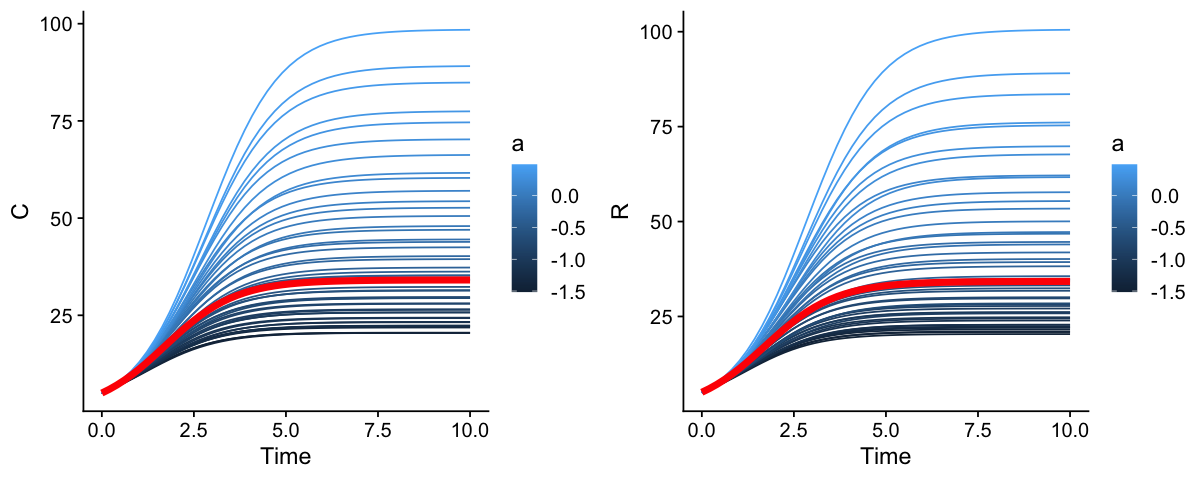

In [1]:
library(tidyverse)
library(cowplot)

#function to get intervals of continuous columns
sampled_mode <- function(vec,p){
    x <- sort(unique(vec))
    indx <- ceiling(p * length(x))
    return(x[indx])
}

Cfiles <- list.files("../Data/Simulations/Theory/C",full.names = T)
Rfiles <- list.files("../Data/Simulations/Theory/R",full.names = T)
afiles <- list.files("../Data/Simulations/Theory/a",full.names = T)

Nint = 50
NE = 10
Ntemp = 15
Ntime = 50

T <- seq(1,-1,length.out = Ntemp)
t <- seq(0,10,length.out = Ntime)
a <- seq(-3,1,length.out = Nint)
Evec <- seq(0,2,length.out = NE)

df_list <- list()

for(i in 1:length(Rfiles)){
    x <- suppressMessages(read_csv(Rfiles[i]))
    y <- suppressMessages(read_csv(afiles[i]))
    z <- suppressMessages(read_csv(Cfiles[i]))
    
    colnames(x) <- T
    colnames(y) <- T
    colnames(z) <- T

    #get Respiration df
    x <- x %>% mutate(E = Evec[i],
                      Time = rep(t, each = Nint),
                      tN = rep(1:Ntime, each = Nint),
                      aN = rep(1:Nint, times = Ntime)) %>%
           gather("Temp","R",-E,-Time,-aN,-tN) %>%
            mutate(Temp = as.numeric(Temp)) 
    
    #get interaction df
    y <- y %>% mutate(E = Evec[i],  Time = rep(t, each = Nint)) %>%
           gather("Temp","a",-E,-Time) %>%
            mutate(Temp = as.numeric(Temp)) 
    
    #get biomass df
    z <- z %>% mutate(E = Evec[i],  Time = rep(t, each = Nint)) %>%
           gather("Temp","C",-E,-Time) %>%
            mutate(Temp = as.numeric(Temp)) 

    x$a <- y$a
    x$C <- z$C
    df_list[[i]] <- x
}

options(repr.plot.width = 10, repr.plot.height = 4)

p1 <- bind_rows(df_list) %>%
    filter(E == 0.0, Temp == 0) %>%
    ggplot(aes(x=Time,y=C,colour=a, group = aN))+
            geom_line() + 
            geom_line(data =  bind_rows(df_list) %>% 
                                  filter(E == 0.0, Temp == 0, aN == 25),
                      colour = "red" , size = 2)+
            theme_cowplot()

p2 <- bind_rows(df_list) %>%
    filter(E == 0.0, Temp == 0) %>%
    ggplot(aes(x=Time,y=R,colour=a, group = aN))+
            geom_line() + 
            geom_line(data =  bind_rows(df_list) %>% 
                                  filter(E == 0.0, Temp == 0, aN == 25),
                      colour = "red" , size = 2)+
            theme_cowplot()

plot_grid(p1,p2)

### Temperature
We can see above that interactions alter the respiratory flux but how does that interact with temperature? To look at this I simulated the sytems above (varying in interaction type) across a range of temperatures. In these simulations the rate of growth $r$, respiration $R$ and interactions $a_{ij}$ were all represented with boltzmann arrhenius equations. By simulating across temperatures we can look at the temperature sensitivity of respiration for the whole system.

#### Just Temperature
I first present the temperature response for an single system (with a given interaction matrix) to show the general effects of temperature on respiration.

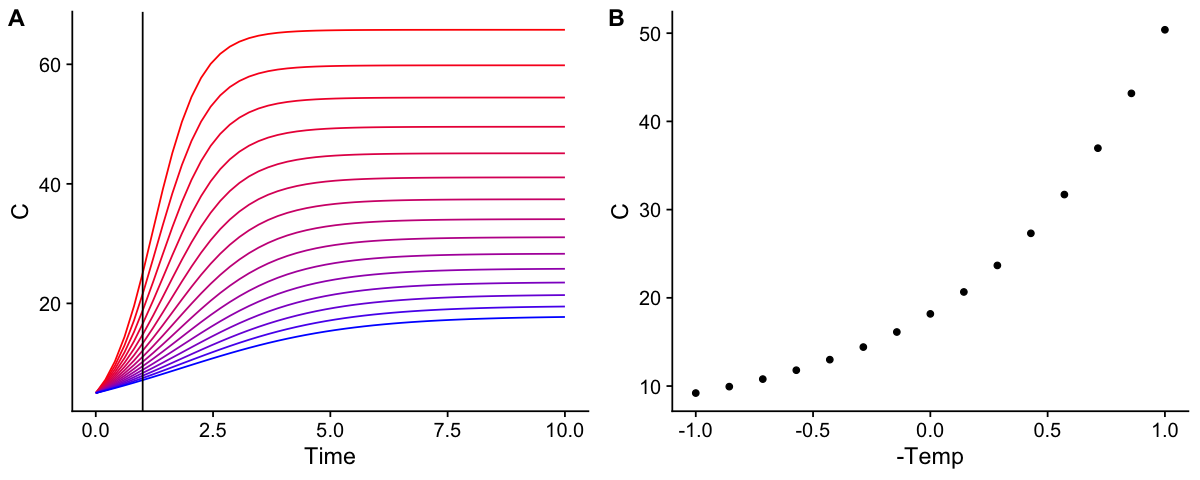

In [2]:
p1 <- bind_rows(df_list) %>%
    filter(E == 0 , aN == 25) %>%
    ggplot(aes(x=Time, y = C, group = Temp, colour = Temp))+
        geom_line()+
        geom_vline(xintercept = 1)+
        scale_color_gradient(low="red", high="blue",guide = F)+
        theme_cowplot()

p2 <- bind_rows(df_list) %>%
    filter(E == 0 ,aN == 25 , tN == 10 ) %>%
    ggplot(aes(x=-Temp,y=C))+
        geom_point()+
        theme_cowplot()

plot_grid(p1,p2,labels = c("A","B"))

The left figure here shows respiratory flux over time at different temperatures (red being hot and blue cold). The right pannel shows the respiratory flux against temperature at $t = 0$.

#### Across interaction strengths
In order to look at the effects of interaction strength on this relationship I consider the ecosystem respiratory flux occuring at a single timepoint across all systems. Using the time at the vertical value in the plots above we can look at the respiration vs temperature curve across a range of interaction strengths:

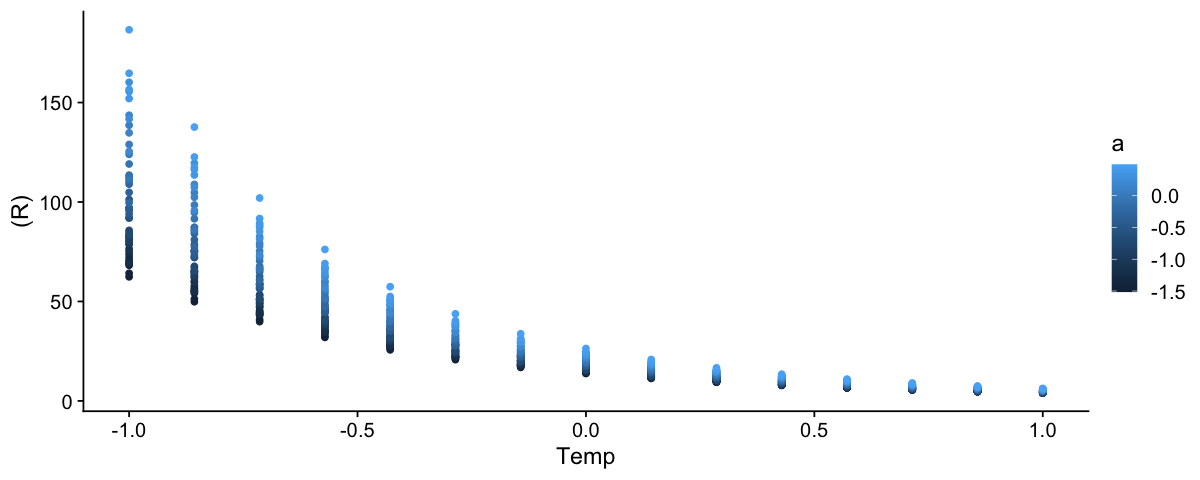

In [3]:
bind_rows(df_list) %>%
    filter(E == 0.0,tN == 10) %>%
    ggplot(aes(x=Temp, y = (R), colour = a))+
        geom_point() +
        theme_cowplot()

Thus we can see that as interactions get more facilative (black to blue) we see a higher temperature sensitvity of respiration in the exponential phase. 

Finally ploting these in logscale we can look at the gradient of these lines to get an estimate of the  E value which clearly increases as we change the average interaction strength across the community:

In [4]:
fits <- bind_rows(df_list) %>%
    nest(-E,-aN, -tN) %>%
    mutate(fit = map(data, ~lm( log(R) ~ (Temp), data = .x)))

fits$E_est <- unname(unlist(lapply(fits$fit,function(x){coef(x)[2]})))


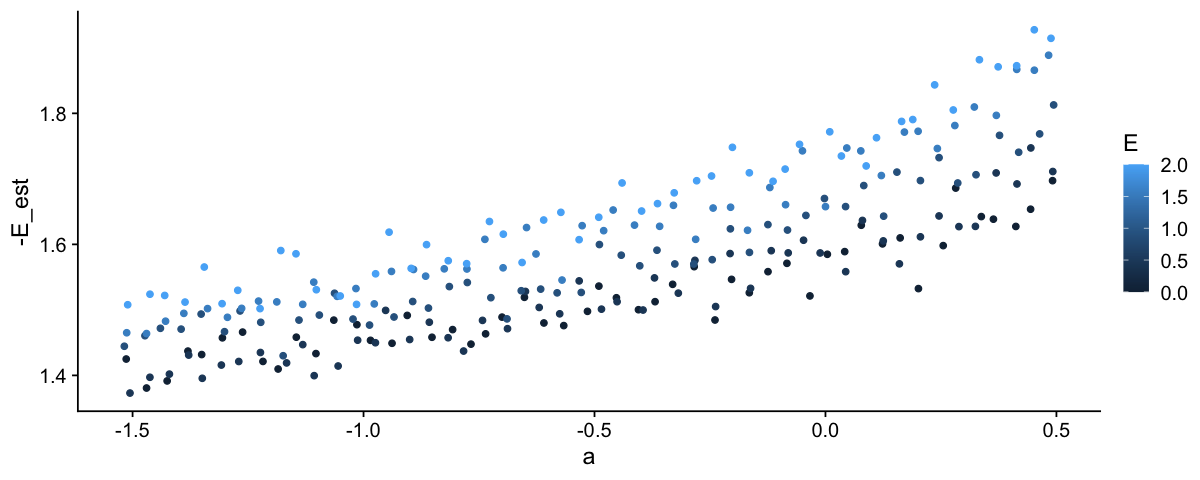

In [6]:
fits %>%
    select(-fit) %>%
    unnest() %>%
    filter(Temp == 0.0, E %in% sampled_mode(E,c(0.1,0.25,0.5,0.75,1.0)), tN == 10 )  %>%
    ggplot(aes(x=a, y = -E_est,colour = E, group = paste(aN)))+
        geom_point()+
        theme_cowplot()
        

Thus it is clear that systems with more faciative interactions will tend to be more sensitive to temperature in their respiratory fluxes.  

# Data

So now we have a prediciton of how interactions hould affect the temperature sensitvity of whole system flux we can see how this compares to the data. Whilst a complete quantitative prediction of respiration rates is not feasable we can see how the change in interactions between species across evolved and non-evolved treatements affects $E_{R_{eco}}$

To do this we need to:
1. Estimate interaction networks for each treatment at each temperature
2. Take these estimates and using the framework above predict how $E_{R_{eco}}$ changes

## Estimating interactions 

To estimate interactions we use the observed difference in growth rates when species are grown in isolation vs when they are grown in pairs. This definition of interactions can be derived by considering the equation describing the growth of species pair:

$$
    \frac{dN_{i}}{dt} = N_i (r_i + a_{ii} N_i + a_{ij} N_j) \quad \frac{dN_{j}}{dt} = N_j (r_j + a_{jj} N_j + a_{ji} N_i)
$$

assuming that at $t=0$ the growth of the pair can be approximated using exponential growth and the biomasses of each species are equal we can define:

$$
\left. \frac{dN_{p}}{dt} \right \lvert_{t = 0} = \left. \frac{dN_{i}}{dt} \right \lvert_{t = 0} + 
                                                 \left. \frac{dN_{j}}{dt} \right \lvert_{t = 0} \approx 
                                                 r_{p} N_p \\
$$


$$
N_p(0) = N_i(0) + N_j(0)\\
N_i(0) = N_j(0) = \frac{N_p(0)}{2}
$$

which gives the expression:

\begin{align}
r_{p} N_p(0) &= N_i(0) (r_i + a_{ii} N_i(0) + a_{ij} N_j) + N_j(0) (r_j + a_{jj} N_j(0) + a_{ji} N_i(0)) 
\\
\\
&= \frac{N_{p}(0)}{2} (r_i + r_j) + \frac{N_{p}(0)}{2}^2 (a_{ii}+a_{jj}) + \frac{N_{p}(0)}{2}^2(a_{ij} + a_{ji})
\end{align}

then assuming that interactions are symmetric $a_{ij} = a_{ji} = \alpha_{ij}$

\begin{align}
r_{p} N_p(0) &= \frac{N_{p}(0)}{2} (r_i + r_j) + \frac{N_{p}(0)}{2}^2 (a_{ii}+a_{jj}) + \frac{N_{p}(0)}{2}^2(2 \alpha_{ij})
\end{align}

$$
\alpha_{ij} = \frac{2r_p - r_i - r_j}{N_p(0)} + \frac{a_{ii} + a_{jj}}{2}
$$

So the interaction between two species is given by the difference growth rate between their pairwise and individual experiments. 

### Bootstraping $\alpha$ values
We now use the equation above to get estimates of interactions between species for each pair, temperature ad treatment in the experiment. We use a bootstraping procedure to generate distributions of estimates using the individual observations of growth rates from the experiments. The procedure is as follows:

1) For a given temperature, treatment and pair sample (with replacement) 1000 observations of individual respiraiton $R_i$ and growth rates $r_i$ as well as the growth rates $r_p$ and $N(0)$ values associated with each pairwise observation. 

2) For these 1000 values calculate $\alpha_{ij}$ using the equation above.

3) save the resutling $\alpha$ values as well as the parameters rates used to calculate them. 

In [7]:
library(tidyverse)
library(cowplot)
cbPalette <- c("#009E73", "#F0E442", "#0072B2")

#### Loading Data
So there are several datasets which we can use to calculate growth rate:
1. Respiration experiments
    * OD
    * FlowCytometry
2. Full growth curve experiments
    * OD?
    
Here I use these datasets to see if they give qualitatively the same answers.

In [185]:
#read in OTU Resp
OTU_R <- read_csv("../data/Francisca/respirationandODData//RespDataLinear_OTUs_evNev.csv",col_types = cols())

OTU_R <- OTU_R %>% mutate(OTU = as.numeric(str_replace(Sps,"R_","")),
       Resp = -Resp,
       Temperature = T,
       Treatment = str_replace(Treatment,regex("^evo"),"Evo"))
###
#Read growth from respiration experiments (Flow cytometry)
###
#Read in OTU growth
OTU_r_flow <- read_csv("../data/Francisca/FlowCytometry_All.csv",col_types = cols()) %>%
    filter(Level == "Species", Id != 9) %>%
    mutate(r = (log(AbuT1) - log(AbuT0)) / AT,
           Treatment = ifelse(Treatment == "Denovo","Nonevolved",Treatment),
          OTU = Id) %>%
    select(OTU,Temperature,Treatment,Media,Replicate,r) %>%
    mutate(r = r - min(r)) %>%
    filter(r > 0.5)

#Read in Pairwise growth
pairs_r_flow <- read_csv("../data/Francisca/FlowCytometry_All.csv", col_types = cols()) %>%
    filter(Level == "Pairs") %>%
    mutate(r = (log(AbuT1)-log(AbuT0))/AT,
          Treatment = recode(Treatment, "Denovo" = "Nonevolved"),
          Temperature = Temperature) %>%
    separate(Id,c("OTU_1","OTU_2"),sep = "-") %>%
    mutate(OTU_1 = ifelse(OTU_1 == "Feb",2,OTU_1)) %>%
    mutate(r = r - min(r)) %>%
    filter(r > 0)

####
#From respiration experiments (OD)
####
#Read in OTU growth
OTU_r_OD_1 <- read_csv("../data/Francisca/respirationandODData/DatosOD_5OTUs_evNev.csv", col_types = cols()) %>%
    mutate(r = (log(OD) - log(OD_T0))/(Tf / 60)) %>%
    select(OTU,Temperature = T, Treatment, Replicate, r)

#Read in Pairwise growth
pairs_r_OD <- read_csv("../data/Francisca/respirationandODData/DatosOD_PairsevNev_u.csv", col_types = cols()) %>%
    mutate(r = (log(OD) - log(OD_T0))/(Tf / 60), OTU = str_replace(OTU,"Feb","2"),
           Treatment = ifelse(Treatment == "evolved", "Evolved",Treatment)) %>%
    separate(OTU,into = c("OTU_1","OTU_2"),sep = "-") %>%
    select(OTU_1,OTU_2,Temperature = T, Treatment, Replicate, r,AbuT0 = OD_T0)
    
####
#From new full growth curve experiments
####
OTU_r_OD_2 <- read_csv("../data/Francisca/LogisticIndivcurves_out_M9_updated.csv", 
                     col_types = cols()) %>%
#     filter(!is.na(Q_r)) %>%
    separate(pa,c("OTU","Media","Treat"),"-") %>%
    separate(Treat,c("Treat","Temp","Rep"),":") %>%
    mutate(Temperature = as.numeric(Temp),
           Temperature = ifelse(Temperature == 27, 27.5, Temperature),
           Treatment = recode(Treat, "NE" = "Nonevolved", "E" = "Evolved"),
           OTU = str_remove(OTU,"OTU") ) %>%
    select(OTU,Media,Temperature,Treatment,r,K)

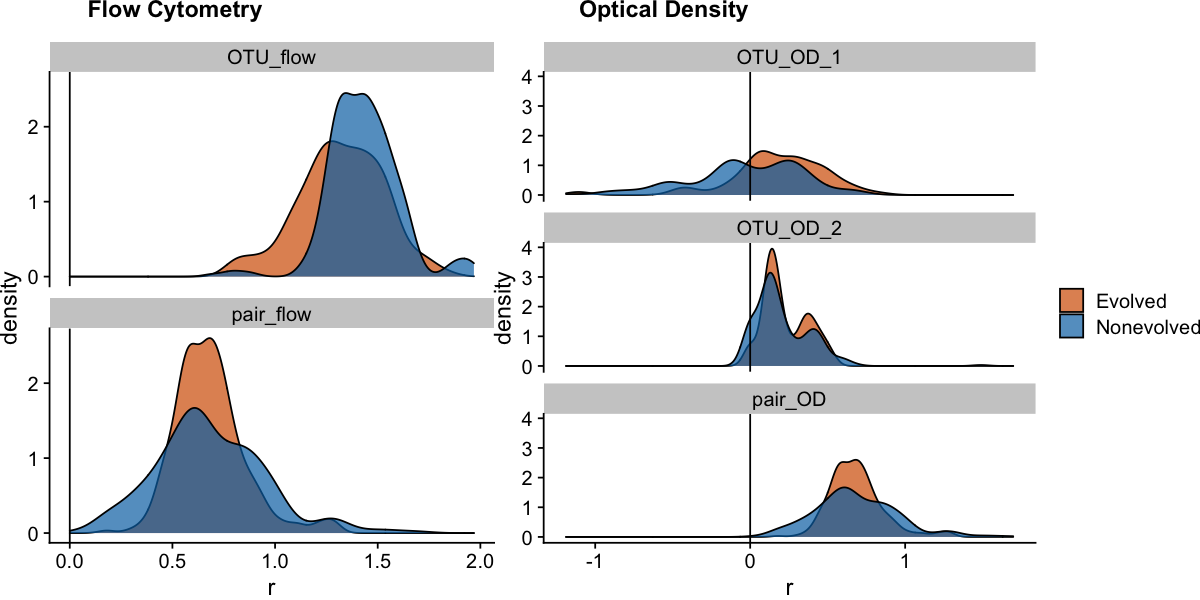

In [187]:
cPalette <- c("#F0E442", "#0072B2", "#D55E00")[c(3,2)]

###
#Flow cytometry data
###
OTU_flow = OTU_r_flow %>% select(Treatment,r)
pair_flow = pairs_r_flow %>% select(Treatment,r)
Data_source = c(rep("OTU_flow",nrow(OTU_flow)), rep("pair_flow",nrow(pair_flow)))

p1 = bind_rows(OTU_flow,pair_flow) %>%
    mutate(Data_source) %>%
    ggplot(aes(x=r,fill = Treatment))+
         geom_density(position = "identity",alpha = 0.7)+
         geom_vline(xintercept = 0.0)+
         scale_fill_manual(values = cPalette)+   
         theme_cowplot() +
         theme(legend.position = "none",plot.margin = margin(25,0,0,0))+
         facet_wrap(~Data_source,ncol = 1)



###
#OD data
###
OTU_OD_1 = OTU_r_OD_1 %>% select(Treatment,r)
OTU_OD_2 = OTU_r_OD_2 %>% select(Treatment,r)
pair_OD = pair_flow %>% select(Treatment,r)
Data_source = c(rep("OTU_OD_1",nrow(OTU_OD_1)), rep("OTU_OD_2",nrow(OTU_OD_2)), rep("pair_OD",nrow(pair_OD)))

p2 <- bind_rows(OTU_OD_1,OTU_OD_2,pair_OD) %>%
    mutate(Data_source) %>%
    filter(r > -2.5 , r < 2.5) %>%
    ggplot(aes(x= r ,fill = Treatment))+
        geom_density(position = "identity",alpha = 0.7)+
        geom_vline(xintercept = 0.0)+
        scale_fill_manual(values = cPalette)+
        theme_cowplot()+
        theme(legend.title = element_blank(),,plot.margin = margin(25,0,0,0))+
        facet_wrap(~Data_source,ncol = 1)


options(repr.plot.width = 10, repr.plot.height = 5)

plot_grid(p1,p2,labels = c("Flow Cytometry","Optical Density"), rel_widths = c(.7,1),vjust = 1.0)

# ggsave("../notebooks/figures/r_distributions.pdf",dist,width = 5, height = 5)

# dist

So we can see here that within the different abundance measurements growth rates are in the right range. It looks like the between the two measurements we see different interaction types. Flow cytometry data suggests that pairs interacted competitively (as they have lower growth rates when grown together) whilst the OD data suggests mutualism (growth rates are higher when grown in pairs).  

#### Getting Interaction strengths

In [136]:
#Functions to do bootstraping

#function to get a single interaction estimate
a <- function(r_p,r_1,r_2,C){
    ((2*r_p - r_1 - r_2) / C) - 1e-7
}

#function to get bootstrap samples for OTU respiration rates
get_OTU_R_samples = function(OTU_vec, Treat, Temp, n){
    #get individual samples
    OTU_samples <- list()
    for(i in 1:length(OTU_vec)){
        OTU_samples[[i]] = OTU_R %>% 
            filter(OTU == OTU_vec[i], Treatment == Treat, Temperature == Temp) 
        
        if(nrow(OTU_samples[[i]]) > 0){
          OTU_samples[[i]] = OTU_samples[[i]] %>%
                pull(Resp) %>%
                sample(.,n,TRUE)
        } else {
            OTU_samples[[i]] = rep(0,n) 
        }
    }
    names(OTU_samples) <- OTU_vec 
    return(OTU_samples)
}

#function to get a bootstraped sample for single OTU growth rates
get_OTU_r_samples = function(OTU_vec, Treat, Temp, n, data = ""){
    #choose dataset 
    if(data == "flow"){
     x = OTU_r_flow  
    } else if(data == "OD_1") {
     x = OTU_r_OD_1   
    } else if(data == "OD_2"){
     x = OTU_r_OD_2  
    } else {stop("dataset not specified correctly")}
        
    #get individual samples
    OTU_samples <- list()
    for(i in 1:length(OTU_vec)){
        OTU_samples[[i]] = x %>% 
            filter(OTU == OTU_vec[i], Treatment == Treat, Temperature == Temp) %>%
            pull(r) %>%
            sample(.,n,TRUE)
    }
    names(OTU_samples) <- OTU_vec 
    return(OTU_samples)
}


#function to get bootstraped paired growth and biomasss
get_Paris_r_samples = function(OTU1,OTU2,Treat, Temp, n,data = ""){
    #choose dataset 
    if(data == "flow"){
     x = pairs_r_flow 
    } else if(data == "OD_1") {
     x = pairs_r_OD   
    } else {stop("dataset not specified correctly")}
        
    #get pair samples
    Pairs_r_samples <- list()
    Pairs_N_samples <- list()

    for(i in 1:length(OTU1)){
        y = x %>%
            filter(OTU_1 == OTU1[i], OTU_2 == OTU2[i], Treatment == Treat, Temperature == Temp)
        
        indx = sample(1:nrow(y),n,TRUE)
        Pairs_r_samples[[i]] = y$r[indx]
        Pairs_N_samples[[i]] = y$AbuT0[indx]
    }
    names(Pairs_r_samples) <- paste(OTU1,OTU2,sep = "-")
    names(Pairs_N_samples) <- paste(OTU1,OTU2,sep = "-")
    
    return(list(Pairs_r_samples,Pairs_N_samples))
}


In [137]:
#function to generate bootstrapped communities at a given temp/treatment
bootstrap <- function(Treat,Temp,n, OTU_data, pair_data){
    #bootstrap OTU R
    OTU_vec = unique(OTU_R$OTU)
    OTU_R_sample = get_OTU_R_samples(OTU_vec,Treat,Temp,n)
    
    #bootstrap OTU r
    OTU_vec = unique(OTU_r$OTU)
    OTU_r_sample = get_OTU_r_samples(OTU_vec,Treat,Temp,n,OTU_data)
    


    #boostrap pairs r
    iter_df = pairs_growth_data %>%
        group_by(OTU_1,OTU_2) %>%
        summarise() 
    Pairs_sample = get_Paris_r_samples(iter_df$OTU_1,iter_df$OTU_2,Treat,Temp,n,pair_data)

    #calculate a values
    a_list <- list()
    #loop through all pairs
    for(i in 1:nrow(iter_df)){
        r1 = OTU_r_sample[[which(iter_df$OTU_1[i] == OTU_vec)]]
        r2 = OTU_r_sample[[which(iter_df$OTU_2[i] == OTU_vec)]]

        rp = Pairs_sample[[1]][[i]]
        cp = Pairs_sample[[2]][[i]]

        a_list[[i]] = (2*rp - r1 - r2)/cp

    }
    names(a_list) <- names(Pairs_sample[[1]])

    #combine to dataframes
    #growth rates 
    growth_df = bind_cols(OTU_r_sample) %>%
        mutate(Rep = 1:n) %>%
        gather("OTU","r",-Rep) %>%
        mutate(Temperature = Temp, Treatment = Treat)

    #resp
    resp_df = bind_cols(OTU_R_sample) %>%
        mutate(Rep = 1:n) %>%
        gather("OTU","R",-Rep) %>%
        mutate(Temperature = Temp, Treatment = Treat)    
    
    #get pairs    
    int_df = bind_cols(a_list) %>%
        mutate(Rep = 1:n) %>%
        gather("pair","a", -Rep) %>%
        separate(pair,c("OTU_1","OTU_2"),"-")%>%
        mutate(Temperature = Temp, Treatment = Treat)
    
    return(list(growth_df,resp_df,int_df))
}

In [140]:
#Flow cytometry interaction estimates

#get unique combinations
Temp_Treat_df = pairs_growth_data %>%
    group_by(Temperature,Treatment) %>%
    summarise() 

grw_list_flow <- list()
res_list_flow <- list()
int_list_flow <- list()

for(i in 1:nrow(Temp_Treat_df)){
    
    estimates = bootstrap(Temp_Treat_df$Treatment[i],Temp_Treat_df$Temperature[i],1000, "flow","flow")
    grw_list_flow[[i]] = estimates[[1]]
    res_list_flow[[i]] = estimates[[2]]
    int_list_flow[[i]] = estimates[[3]]
}

In [145]:
#OD interaction estimates

#get unique combinations
# Temp_Treat_df_2 <- OTU_r_cyt %>% 
#     group_by(Temperature,Treatment) %>%
#     summarise() %>% ungroup() %>%
#     semi_join(Temp_Treat_df)

grw_list_OD <- list()
res_list_OD <- list()
int_list_OD <- list()

for(i in 1:nrow(Temp_Treat_df)){
    estimates = bootstrap(Temp_Treat_df$Treatment[i],Temp_Treat_df$Temperature[i],1000, "OD_1","OD_1")
    grw_list_OD[[i]] = estimates[[1]]
    res_list_OD[[i]] = estimates[[2]]
    int_list_OD[[i]] = estimates[[3]]
}

### Results

First we can look at the estimates of interactions across temperature for each pair treatement combination

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


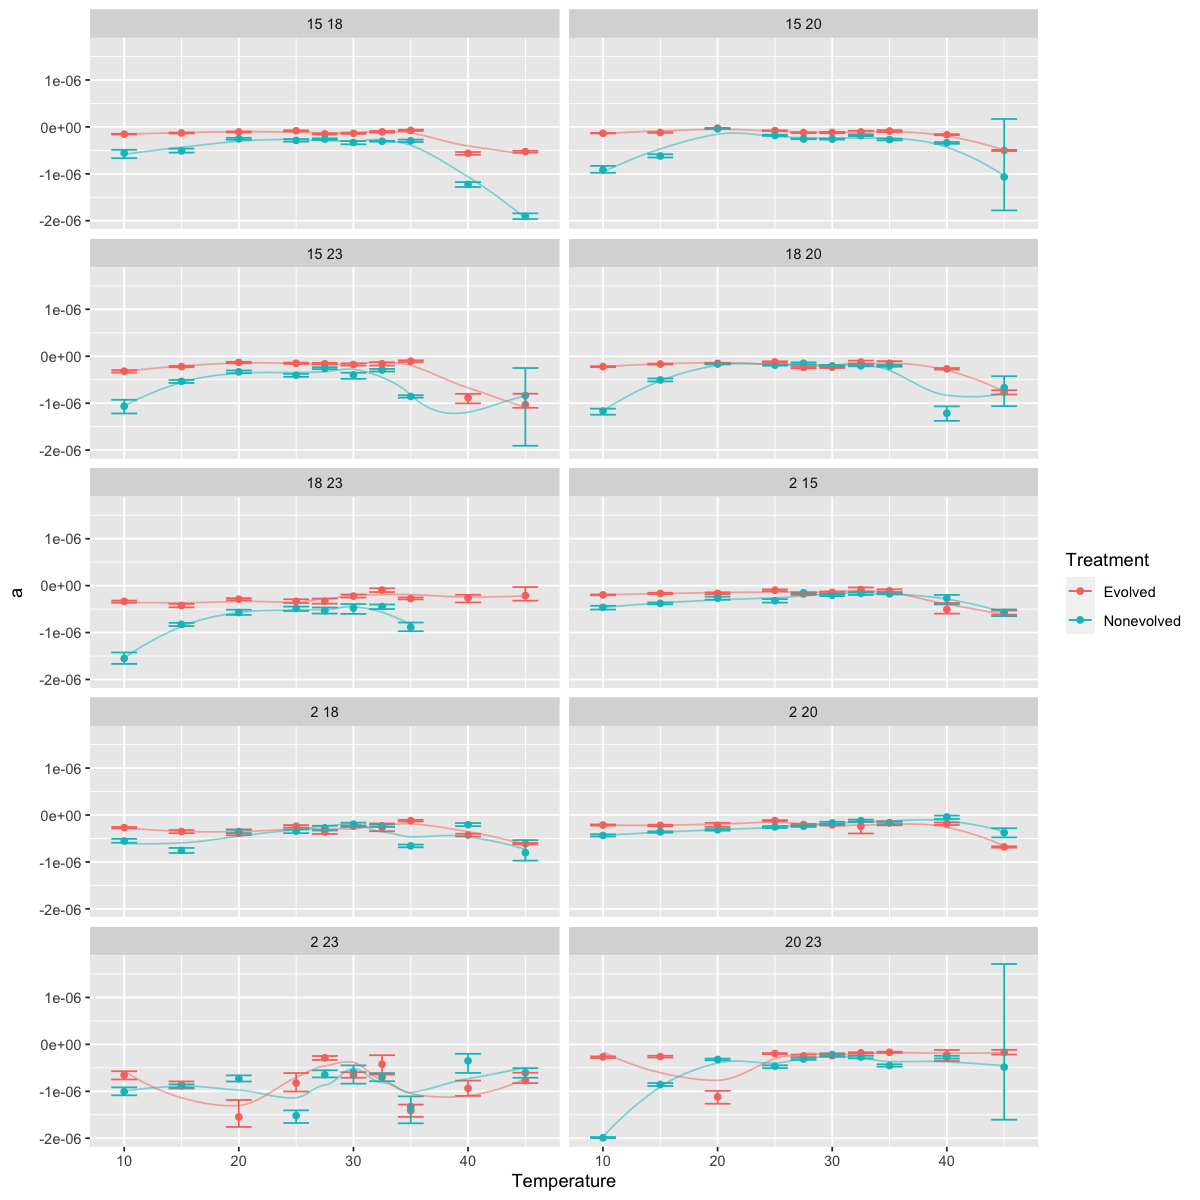

In [146]:
options(repr.plot.width = 10, repr.plot.height = 10)

p1 = bind_rows(int_list_flow) %>%
    filter(a > -2e-6, a< 2e-6) %>%
    group_by(OTU_1,OTU_2,Treatment,Temperature) %>%
    summarise(mean = mean(a), upr = quantile(a,0.95),lwr = quantile(a,0.05)) %>%
    filter(mean < 0) %>%
    ggplot(aes(x = Temperature, y= mean ,colour = Treatment))+
        geom_point()+
        geom_errorbar(aes(ymin = lwr, ymax = upr)) + 
        facet_wrap(~paste(OTU_1,OTU_2),ncol = 2)+
        stat_smooth(geom='line', alpha=0.5, se=FALSE)+
        ylab("a")

ggsave("../notebooks/figures/a_original.pdf",p1,width = 10, height = 10)


p1       

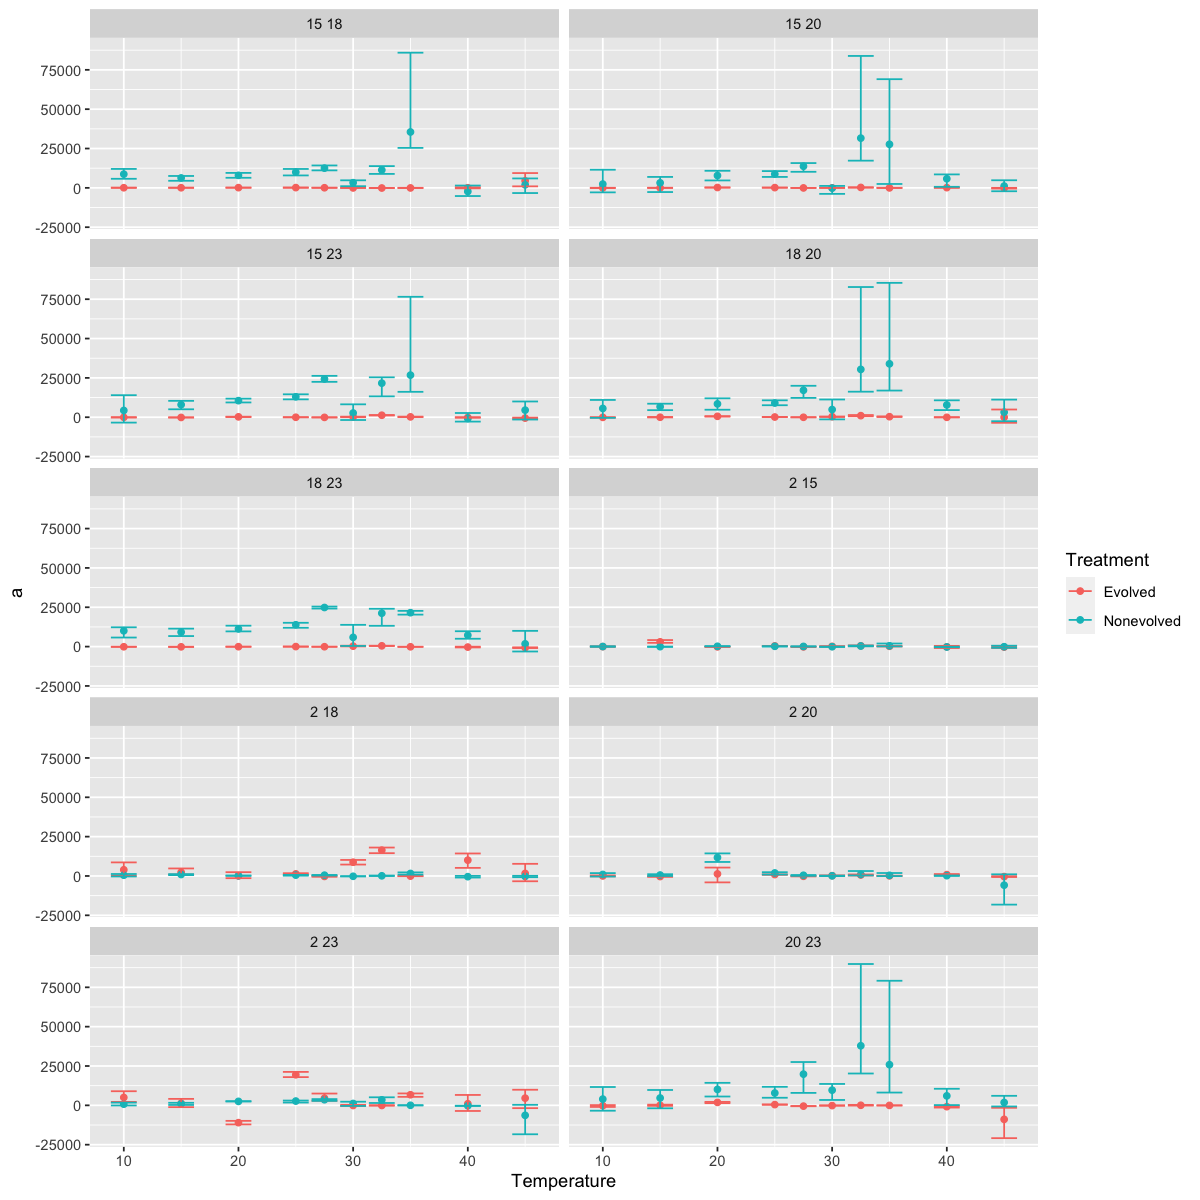

In [147]:
p2 = bind_rows(int_list_OD) %>%
#     filter(a > -2e-6, a< 2e-6) %>%
    group_by(OTU_1,OTU_2,Treatment,Temperature) %>%
    summarise(mean = mean(a), upr = quantile(a,0.95),lwr = quantile(a,0.05)) %>%
    ggplot(aes(x=Temperature,y=mean,colour = Treatment))+
        geom_point()+
        geom_errorbar(aes(ymin = lwr, ymax = upr)) + 
        facet_wrap(~paste(OTU_1,OTU_2),ncol = 2)+
        ylab("a")

ggsave("../notebooks/figures/a_new.pdf",p2,width = 10, height = 10)

p2

Looks like overall the evolved pairs tend to have weaker interactions (less negative) and have lower temperature sensitvity. This fits with the idea that the species evolved together are less competitive. Interestingly the estimate of interactions is generally unimodal with the lowest rates at intermediate temperatures. 

### Simulating Communities

So taking these estimates of interactions the next step is to determine how they affect ecosysytem level respiration. To do this we take each of the bootstraped parameter colelctions (a set of growth rates and interaction terms) and simulate the dynamics that result. This uses the GLV discussed before:

$$
\frac{dC_i}{dt} = C_i (r_i + a_{ii}C_i + \sum_{i \neq j}^{N} a_{ij} C_j)
$$

By simualting over time we get solutions for biomass over time allowing us to calculate total respiration at any point from:

$$
R_{eco} = \sum_{i=0} R_i(T) \ C_i(T,t)
$$

In [38]:
#constructing communities
key <- c("2"="1","15"="2","18"="3","20"="4","23"="5")

bind_rows(int_list) %>%
    mutate(OTU_1 = recode(OTU_1,!!!key), OTU_2 = recode(OTU_2,!!!key)) %>% 
    write_csv("../data/Simulations/Interaction_params.csv")

bind_rows(res_list) %>%
    mutate(OTU = recode(as.character(OTU),!!!key)) %>%
     write_csv("../data/Simulations/Resp_params.csv")

bind_rows(grw_list) %>%
    mutate(OTU = recode(OTU,!!!key)) %>% 
    write_csv("../data/Simulations/Growth_params.csv")

# Simulation Results

In [39]:
Com_R_bootstrap <- suppressMessages(read_csv("../data/Simulations/Commmunity_resp_bootstrap.csv")) %>%
    gather("Time","with_interactions",-Temp,-Treat,-Avg_int) %>%
    mutate(Time = as.numeric(Time))

Com_R_bootstrap_pred <- suppressMessages(read_csv("../data/Simulations/Commmunity_resp_bootstrap_pred.csv")) %>%
    gather("Time","no_interactions",-Temp,-Treat,-Avg_int) %>%
    mutate(Time = as.numeric(Time))

Com_R <- left_join(Com_R_bootstrap,Com_R_bootstrap_pred) %>%
    gather("Type","R",with_interactions,no_interactions)

Joining, by = c("Temp", "Treat", "Avg_int", "Time")


First we look at the TPCs of ecosystem respiration at differnt times

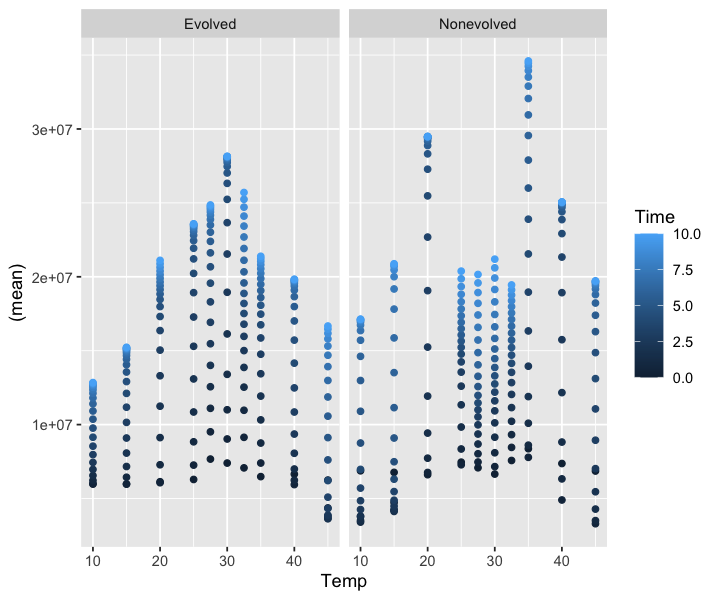

In [40]:
options(repr.plot.width = 6, repr.plot.height = 5)

Com_R %>%
    filter(Type == "with_interactions") %>%
    group_by(Temp,Treat,Time) %>%
    summarise(mean = mean(R)) %>%
    ggplot(aes(x=Temp,y=(mean),colour = Time,group = paste(Time,Treat)))+
        geom_point()+
        facet_wrap(~Treat)

Though a little messy it generally seems that evolved communties have higher sensivity of respiration. To get an idea of this we can fit boltzman equations to get E values. 

In [41]:
R_fits <- Com_R %>%
    filter(Temp < 30) %>%
    mutate(Temp = 1 / ( (273.15 + Temp) * 8.617e-5)) %>%
    nest(-Treat,-Time,-Type) %>%
    mutate(fit = map(data, ~lm(log(R) ~Temp, data = .x)))

# #get Estimates of E and confints
R_fits$E <- unname(unlist(lapply(R_fits$fit, function(x){( coef(x)[2] )})))

x <- lapply(R_fits$fit, function(x){data.frame(ci_lw = confint(x)[2,1], ci_hi = confint(x)[2,2] )}) %>%
    bind_rows()

R_fits <- cbind(R_fits,x)

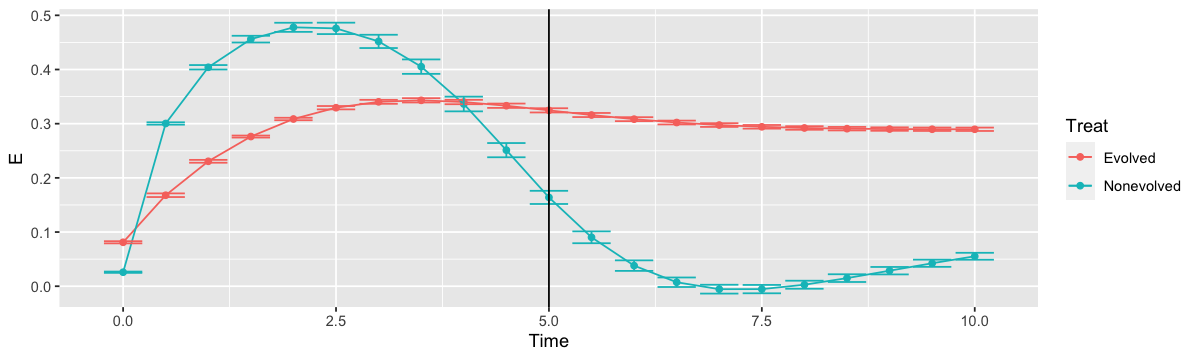

In [74]:
options(repr.plot.width = 10, repr.plot.height = 3)

R_fits %>% 
    filter(Type == "with_interactions") %>%
    select(Time, Treat, Type, E,ci_lw,ci_hi) %>%
    ggplot(aes(x=Time, y = -E, colour = Treat, group = paste(Treat)))+
        geom_point()+
        geom_line()+
        geom_errorbar(aes(ymin = -ci_lw, ymax = -ci_hi))+
        ylab("E")+
        geom_vline(xintercept = 5.0)

Which when plotted shows the thermal sensitvity of respiraiton across time. The black line here is the 5 hour mark at which most of the experimental measurements were made. At this point we can see the evolved treatment is more sensitive as we expect. 

In [17]:
library(nls.multstart)
library(rTPC)
library(broom)

OTU_r <- OTU_r %>%
    mutate(K = Temperature + 273.15)

OTU_r_fits <- OTU_r %>%
    nest(-OTU,-Treatment) %>%
    mutate(., ss = map(data, ~nls_multstart(r ~ sharpeschoolhigh_1981(temp_k = K, r_tref, e, eh, th, tref = 20),
                       data = .x,
                       iter = 1000,
                       lower = c(r_t_ref = -Inf, e = 0, eh = 0, th = 300),
                       upper = c(r_t_ref = Inf,  e = 1, eh = 3, th = 320),
                       start_lower = get_start_vals(.x$K, .x$r, model_name = 'sharpeschoolhigh_1981') - 10,
                       start_upper = get_start_vals(.x$K, .x$r, model_name = 'sharpeschoolhigh_1981') + 10,
                       supp_errors = 'Y')))
    
#predicting fits
newdata <- tibble(K = seq(min(OTU_r$K), max(OTU_r$K), length.out = 100))

OTU_r_pred <- gather(OTU_r_fits, 'model', 'output', ncol(OTU_r_fits)) %>%
          unnest(., output %>% map(augment, newdata = newdata))

#Add E estimate
OTU_r_fits$E <- lapply(OTU_r_fits$ss, function(x){coef(x)['e']})

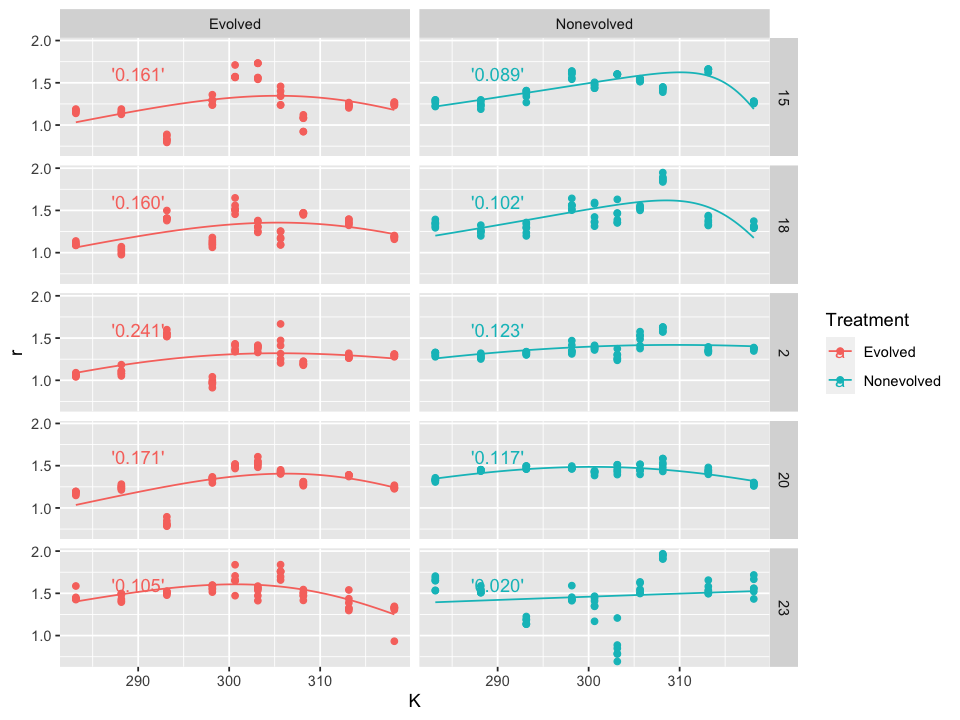

In [18]:
options(repr.plot.width = 8, repr.plot.height = 6)

OTU_r %>%
    ggplot(aes(x=K, y = r,colour=Treatment))+
    geom_point()+
    facet_grid(OTU~Treatment) + 
    geom_line(data = OTU_r_pred , aes(y =`.fitted`))+
    geom_text(data = OTU_r_fits , x = 290, y = 1.6, aes(label = sprintf("'%0.3f'",E )))

# Communtity Respiration

In [19]:


#read in community level data
Com_R <- suppressMessages(read_csv("../data/Francisca/respirationandODData/RespirationRawData_Com.csv")) %>%
    separate(Com,c("Treatment","Media"))  %>%
    mutate(K = T + 273.15,
           Treatment = recode(Treatment,"Cn" = "Nonevolved","Ce" = "Evolved"),
           Resp = -Resp)  %>%
    select(-T) %>%
    filter(Resp > 0, K <= 310, K > 285)

Com_R_fits <- Com_R %>%
    ungroup() %>%
    nest(-Treatment,-Media) %>%
    mutate(., ss = map(data, ~nls_multstart(Resp ~ sharpeschoolhigh_1981(temp_k = K, r_tref, e, eh, th, tref = 20),
                       data = .x,
                       iter = 1000,
                       upper = c(r_t_ref = Inf, e = Inf, eh = Inf, th = 310),
                       lower = c(r_t_ref = -Inf, e = 0,   eh = 0,   th = 0),
                       start_lower = get_start_vals(.x$K, .x$Resp, model_name = 'sharpeschoolhigh_1981') - 10,
                       start_upper = get_start_vals(.x$K, .x$Resp, model_name = 'sharpeschoolhigh_1981') + 10,
                       supp_errors = 'Y')))

    
#predicting fits
newdata <- tibble(K = seq(min(Com_R$K), max(Com_R$K), length.out = 100))

Com_R_pred <- gather(Com_R_fits, 'model', 'output', ncol(Com_R_fits)) %>%
          unnest(., output %>% map(augment, newdata = newdata))

#Add E estimate
Com_R_fits$E <- lapply(Com_R_fits$ss, function(x){coef(x)['e']})

In [20]:
Com_R_fits$E

[[1]]
       e 
0.852254 

[[2]]
       e 
2.244998 

[[3]]
       e 
2.181117 

[[4]]
        e 
0.9435022

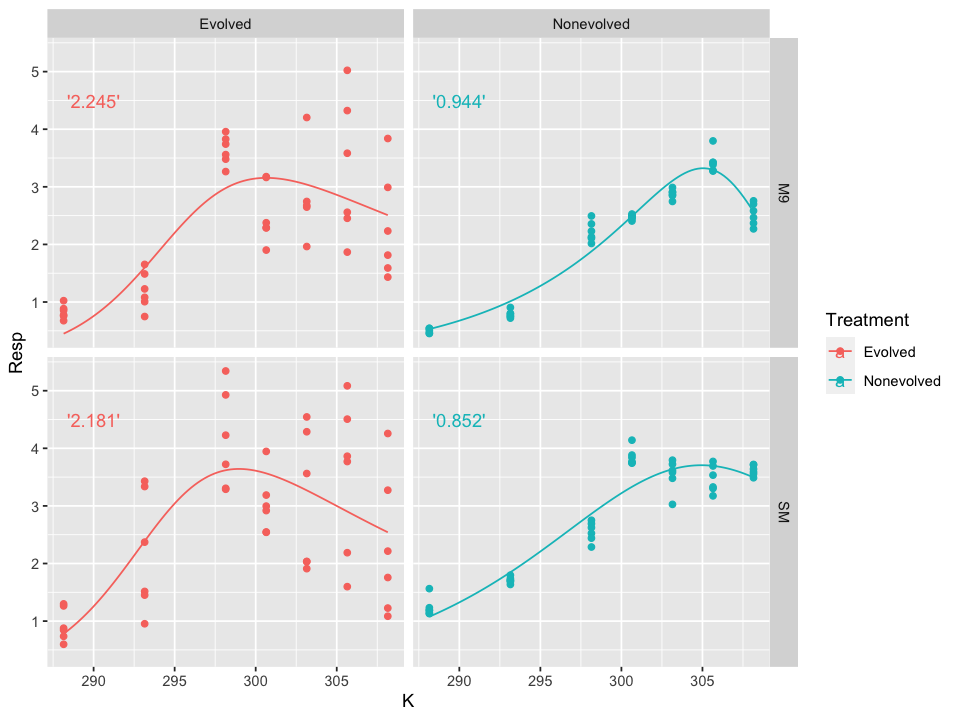

In [21]:
options(repr.plot.width = 8, repr.plot.height = 6)

Com_R %>%
    ggplot(aes(x=K,y = Resp,colour=Treatment))+
    geom_point()+
    facet_grid(Media~Treatment) + 
    geom_line(data = Com_R_pred , aes(y =`.fitted`))+
    geom_text(data = Com_R_fits , x = 290, y = 4.5, aes(label = sprintf("'%0.3f'",E )))

In [ ]:
growth_df